In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
import numpy as np
import pandas as pd

C:\Users\NFSI291\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def summary(df) :
    tf = pd.DataFrame({'데이터크기' : df.shape[0],
                       '데이터형태(dtypes)' : df.dtypes,
                       '결측치 수(null)' : df.isnull().sum(),
                       '결측비율(%)' : (df.isnull().sum()/len(df)).round(4)*100,
                       '고유값 수(nunique)' : df.nunique()})
    return tf

In [3]:
births = pd.read_csv('../data/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [9]:
births.month.value_counts().sort_index()

1     1306
2     1240
3     1310
4     1287
5     1305
6     1288
7     1308
8     1309
9     1288
10    1308
11    1290
12    1308
Name: month, dtype: int64

In [4]:
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [12]:
1969//10
1960//10

196

196

In [13]:
births['decade'] = 10 * (births['year'] // 10)

In [14]:
births.pivot_table('births', columns='gender', aggfunc='sum')

gender,F,M
births,74035823,77738555


In [15]:
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


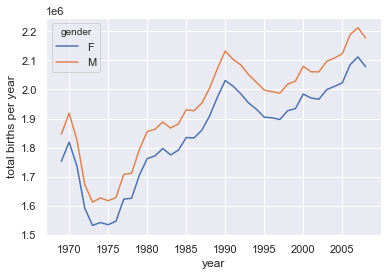

In [16]:
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

In [21]:
data = births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
data.loc['total'] = data.sum(0)
data['total']= data.sum(1)
data

gender,F,M,total
decade,,,
1960,1753634,1846572,3600206
1970,16263075,17121550,33384625
1980,18310351,19243452,37553803
1990,19479454,20420553,39900007
2000,18229309,19106428,37335737
total,74035823,77738555,151774378


In [22]:
births.head()
births.shape

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


(15547, 6)

In [23]:
quartiles = np.percentile(births['births'], [25, 50, 75])
quartiles

array([4358. , 4814. , 5289.5])

In [24]:
births['births'].median()

4814.0

In [25]:
mu = quartiles[1] # mu is median
sig = 0.74 * (quartiles[2] - quartiles[0])

변수명(혹은 사용자 함수)을 정의하고 변수(함수)명 앞에 @를 붙여서 사용할 수 있음

In [26]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15062,1988,12,29.0,M,5944,1980
15063,1988,12,30.0,F,5742,1980
15064,1988,12,30.0,M,6095,1980
15065,1988,12,31.0,F,4435,1980


In [27]:
summary(births)

,데이터크기,데이터형태(dtypes),결측치 수(null),결측비율(%),고유값 수(nunique)
year,14610,int64,0,0.0,20
month,14610,int64,0,0.0,12
day,14610,float64,0,0.0,31
gender,14610,object,0,0.0,2
births,14610,int64,0,0.0,2604
decade,14610,int64,0,0.0,3


실수형 변수를 정수형으로 변환(astype)

In [28]:
births['day'] = births['day'].astype(int) 

C:\Users\NFSI291\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


create a datetime index from the year, month, day

In [30]:
births

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960
...,...,...,...,...,...,...
15062,1988,12,29,M,5944,1980
15063,1988,12,30,F,5742,1980
15064,1988,12,30,M,6095,1980
15065,1988,12,31,F,4435,1980


In [19]:
10000 * births.year + 100 * births.month + births.day

0        19690101
1        19690101
2        19690102
3        19690102
4        19690103
           ...   
15062    19881229
15063    19881230
15064    19881230
15065    19881231
15066    19881231
Length: 14610, dtype: int64

In [31]:
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

C:\Users\NFSI291\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
births

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4
...,...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,1980,3
1988-12-30,1988,12,30,F,5742,1980,4
1988-12-30,1988,12,30,M,6095,1980,4
1988-12-31,1988,12,31,F,4435,1980,5


In [33]:
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean')

decade,1960,1970,1980
dayofweek,,,
0,5063.826923,4689.097701,5276.907249
1,5286.096154,4885.252399,5503.842553
2,5074.622642,4750.376200,5367.642553
3,4978.288462,4696.923372,5333.485106
4,5107.884615,4782.095785,5393.087234
5,4651.057692,4207.784483,4483.901064
6,4342.346154,3979.278736,4308.120469


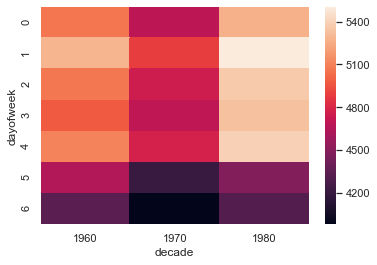

In [34]:
import seaborn as sns
sns.heatmap(births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean'))

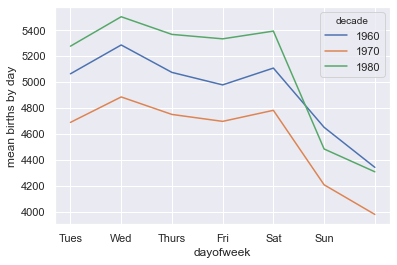

In [35]:
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [36]:
births

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4
...,...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,1980,3
1988-12-30,1988,12,30,F,5742,1980,4
1988-12-30,1988,12,30,M,6095,1980,4
1988-12-31,1988,12,31,F,4435,1980,5


In [37]:
births.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', length=14610)

In [38]:
births_by_date = births.pivot_table('births', [births.index.month, births.index.day]) # default aggfunc='mean'
births_by_date

births
1  1   4009.225
   2   4247.400
   3   4500.900
   4   4571.350
   5   4603.625
...         ...
12 27  4850.150
   28  5044.200
   29  5120.150
   30  5172.350
   31  4859.200

[366 rows x 1 columns]

In [39]:
births_by_date.index[0:10]

MultiIndex([(1,  1),
            (1,  2),
            (1,  3),
            (1,  4),
            (1,  5),
            (1,  6),
            (1,  7),
            (1,  8),
            (1,  9),
            (1, 10)],
           )

In [40]:
for (i, j) in births_by_date.index[0:5]:
    pd.datetime(2012, i, j)

C:\Users\NFSI291\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


datetime.datetime(2012, 1, 1, 0, 0)

datetime.datetime(2012, 1, 2, 0, 0)

datetime.datetime(2012, 1, 3, 0, 0)

datetime.datetime(2012, 1, 4, 0, 0)

datetime.datetime(2012, 1, 5, 0, 0)

In [41]:
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]
births_by_date

C:\Users\NFSI291\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625
...,...
2012-12-27,4850.150
2012-12-28,5044.200
2012-12-29,5120.150
2012-12-30,5172.350


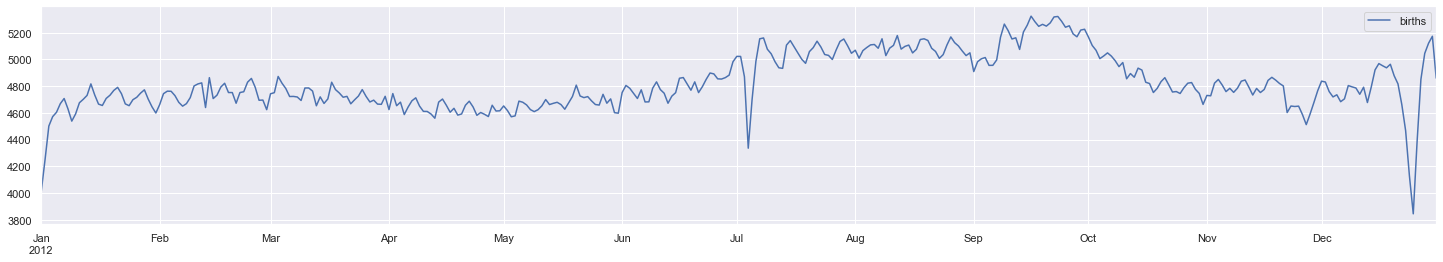

In [47]:
fig, ax = plt.subplots(figsize=(25, 4))
births_by_date.plot(ax=ax);
plt.savefig('../output/births.png')

In [ ]:
save.figure('../output/births_by_date.plot(ax=ax)')

In [43]:
births

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4
...,...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,1980,3
1988-12-30,1988,12,30,F,5742,1980,4
1988-12-30,1988,12,30,M,6095,1980,4
1988-12-31,1988,12,31,F,4435,1980,5
